# Analyse exploratoire des données

In [124]:
# Importation des librairies
from datetime import datetime, time
import pandas as pd
import numpy as np
from scipy.stats import *
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
data = pd.read_csv('../output/cleaned_data/data_cleaned.csv', parse_dates=['date'])
data.time_taken = pd.to_timedelta(data.time_taken)
data.head()

,date,airline,dep_time,from,time_taken,stop,arr_time,to,price,class
0,2022-02-11,Air India,18:00:00,Delhi,0 days 02:00:00,0-stop,20:00:00,Mumbai,25612,business
1,2022-02-11,Air India,19:00:00,Delhi,0 days 02:15:00,0-stop,21:15:00,Mumbai,25612,business
2,2022-02-11,Air India,20:00:00,Delhi,1 days 00:45:00,1-stop,20:45:00,Mumbai,42220,business
3,2022-02-11,Air India,21:25:00,Delhi,1 days 02:30:00,1-stop,23:55:00,Mumbai,44450,business
4,2022-02-11,Air India,17:15:00,Delhi,0 days 06:40:00,1-stop,23:55:00,Mumbai,46690,business


In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300182 entries, 0 to 300181
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype          
---  ------      --------------   -----          
 0   date        300182 non-null  datetime64[ns] 
 1   airline     300182 non-null  object         
 2   dep_time    300182 non-null  object         
 3   from        300182 non-null  object         
 4   time_taken  300182 non-null  timedelta64[ns]
 5   stop        300182 non-null  object         
 6   arr_time    300182 non-null  object         
 7   to          300182 non-null  object         
 8   price       300182 non-null  int64          
 9   class       300182 non-null  object         
dtypes: datetime64[ns](1), int64(1), object(7), timedelta64[ns](1)
memory usage: 22.9+ MB


## Analyse Univariée

### Variables qualitatives

In [118]:
# Date
date_grouped = data.groupby(data['date'].dt.to_period('D')).agg(count=('date', 'count')).reset_index()
date_grouped['date'] = date_grouped['date'].dt.to_timestamp()
date_grouped

,date,count
0,2022-02-11,1926
1,2022-02-12,4031
2,2022-02-13,4250
3,2022-02-14,5078
4,2022-02-15,5395
5,2022-02-16,5740
6,2022-02-17,5703
7,2022-02-18,5768
8,2022-02-19,5669
9,2022-02-20,5823


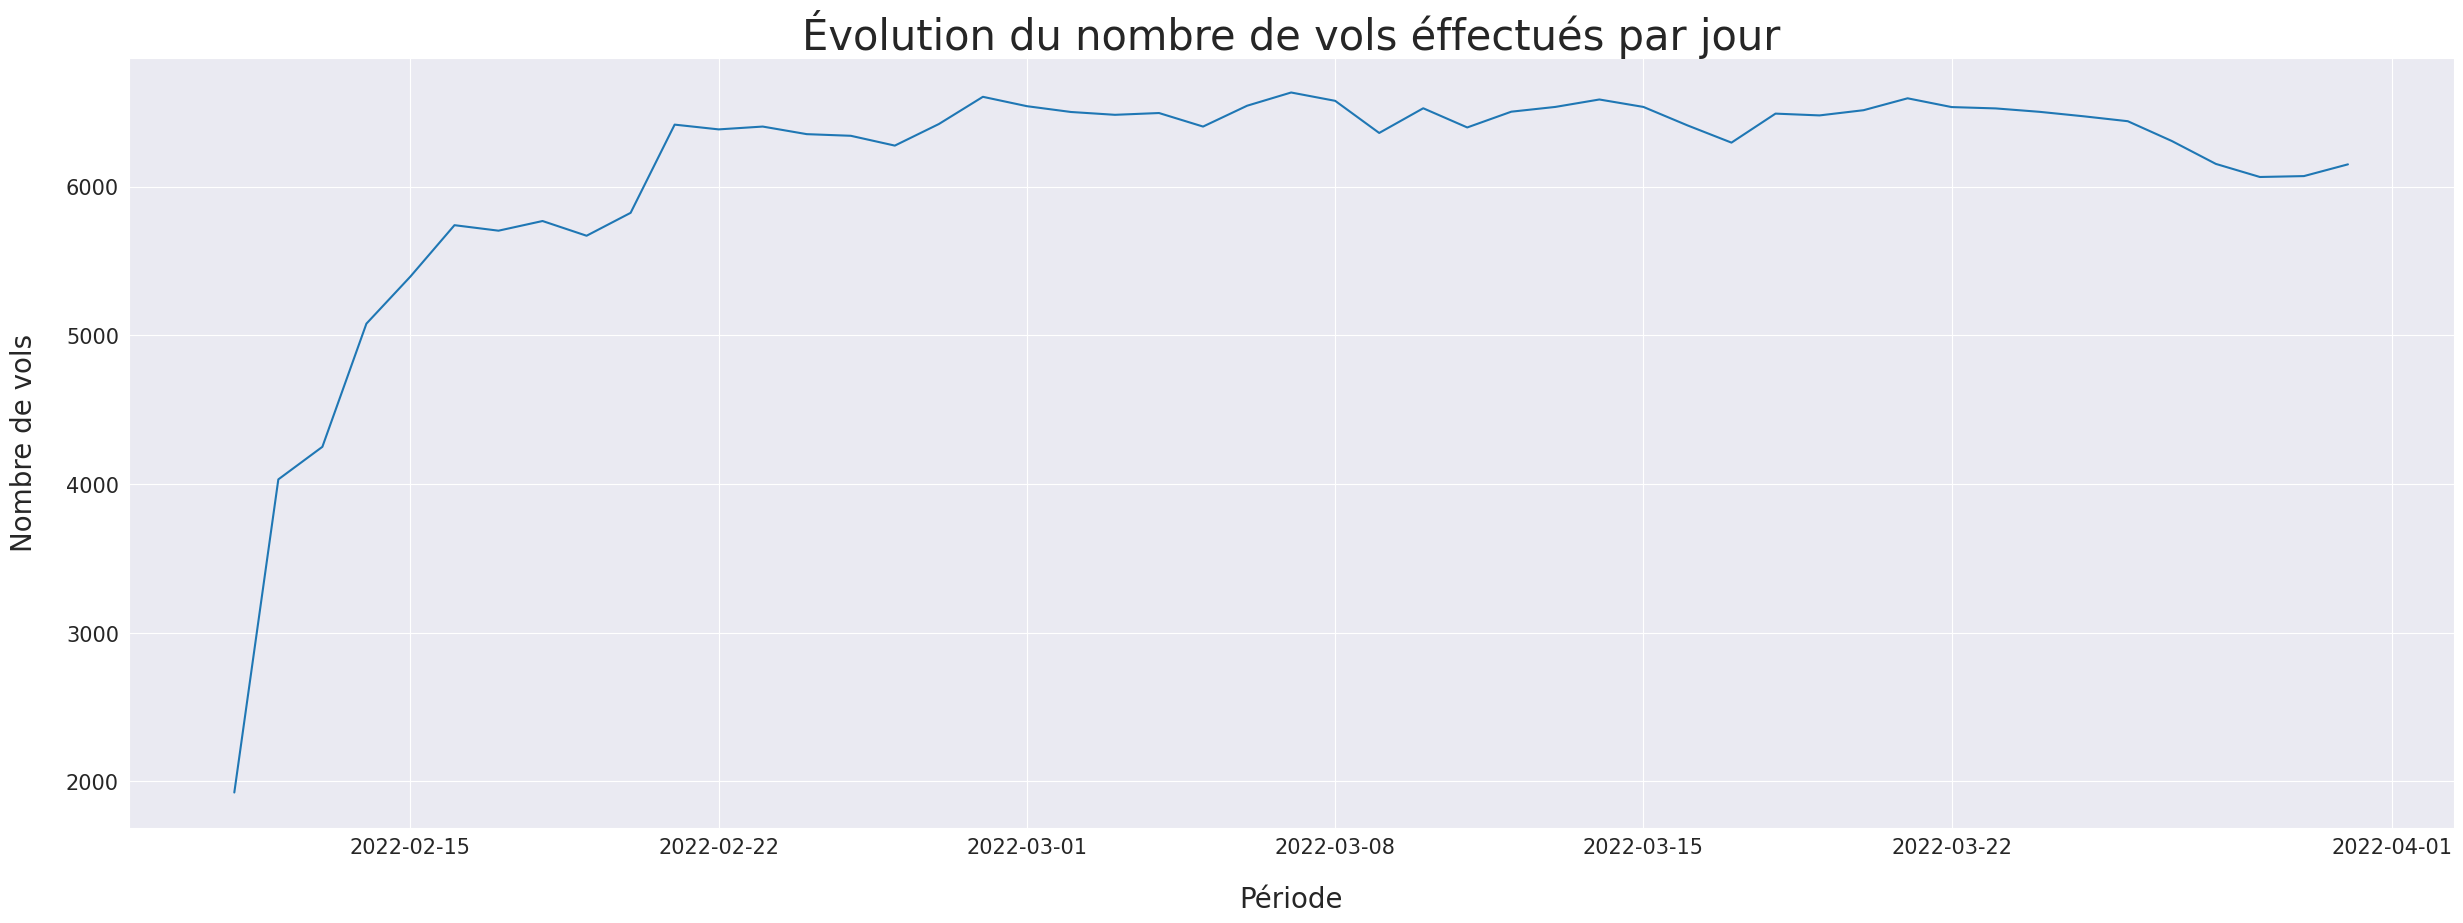

In [119]:
plt.figure(figsize=(30, 10))
plt.title('Évolution du nombre de vols éffectués par jour', fontsize=30)
plt.xlabel("Période", fontsize=20, labelpad=20); plt.ylabel("Nombre de vols", fontsize=20, labelpad=20)
plt.tick_params(labelsize=15)
sns.lineplot(data=date_grouped, x='date', y='count')
plt.show()

On remarque une forte hausse journalière du nombre de vols éffectués entre le mois de février et mars, puis une stabilisation au cours des mois de mars et avril.

In [120]:
# Compagnie aérienne
data['airline'].value_counts()

airline
Vistara      127859
Air India     80892
Indigo        43114
GO FIRST      23145
AirAsia       16059
SpiceJet       9011
StarAir          61
Trujet           41
Name: count, dtype: int64

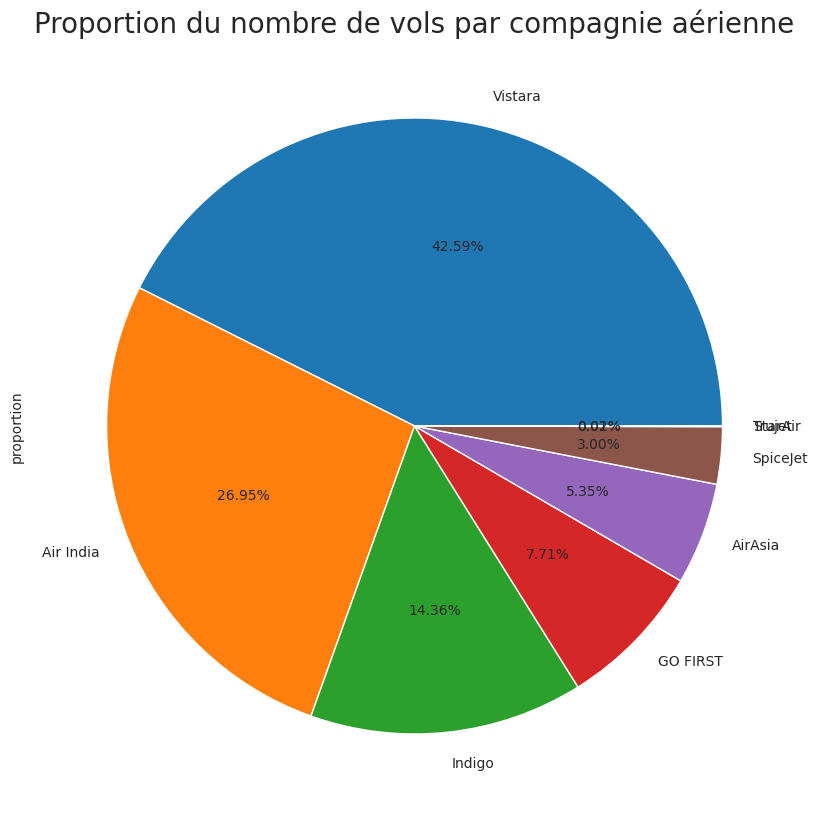

In [137]:
# Visualisation
plt.figure(figsize=(30, 10))
plt.title('Proportion du nombre de vols par compagnie aérienne', fontsize=20)
data['airline'].value_counts(normalize=True).plot(kind='pie', autopct='%.2f%%')
plt.show()

Les vols éffectués par la compagnie aérienne **Vistara** représente ici près de la moitié des vols enregistrés, puis suit la compagnie **Air India** avec 27% de vols soit un peu plus d'un quart des vols.

In [125]:
def define_period(hour):
    if time(4) <= hour < time(6):
        return 'aube'
    elif time(6) <= hour < time(12):
        return 'matin'
    elif time(12) <= hour < time(14):
        return 'midi'
    elif time(14) <= hour < time(18):
        return 'apres-midi'
    elif time(18) <= hour < time(23):
        return 'soir'
    else:
        return 'nuit'

In [126]:
# On catégorise les heures par les moments de la journée
data['dep_time'] = pd.to_datetime(data['dep_time'], format='%H:%M:%S').dt.time
data['arr_time'] = pd.to_datetime(data['arr_time'], format='%H:%M:%S').dt.time
data['dep_time'] = data['dep_time'].apply(define_period)
data['arr_time'] = data['arr_time'].apply(define_period)

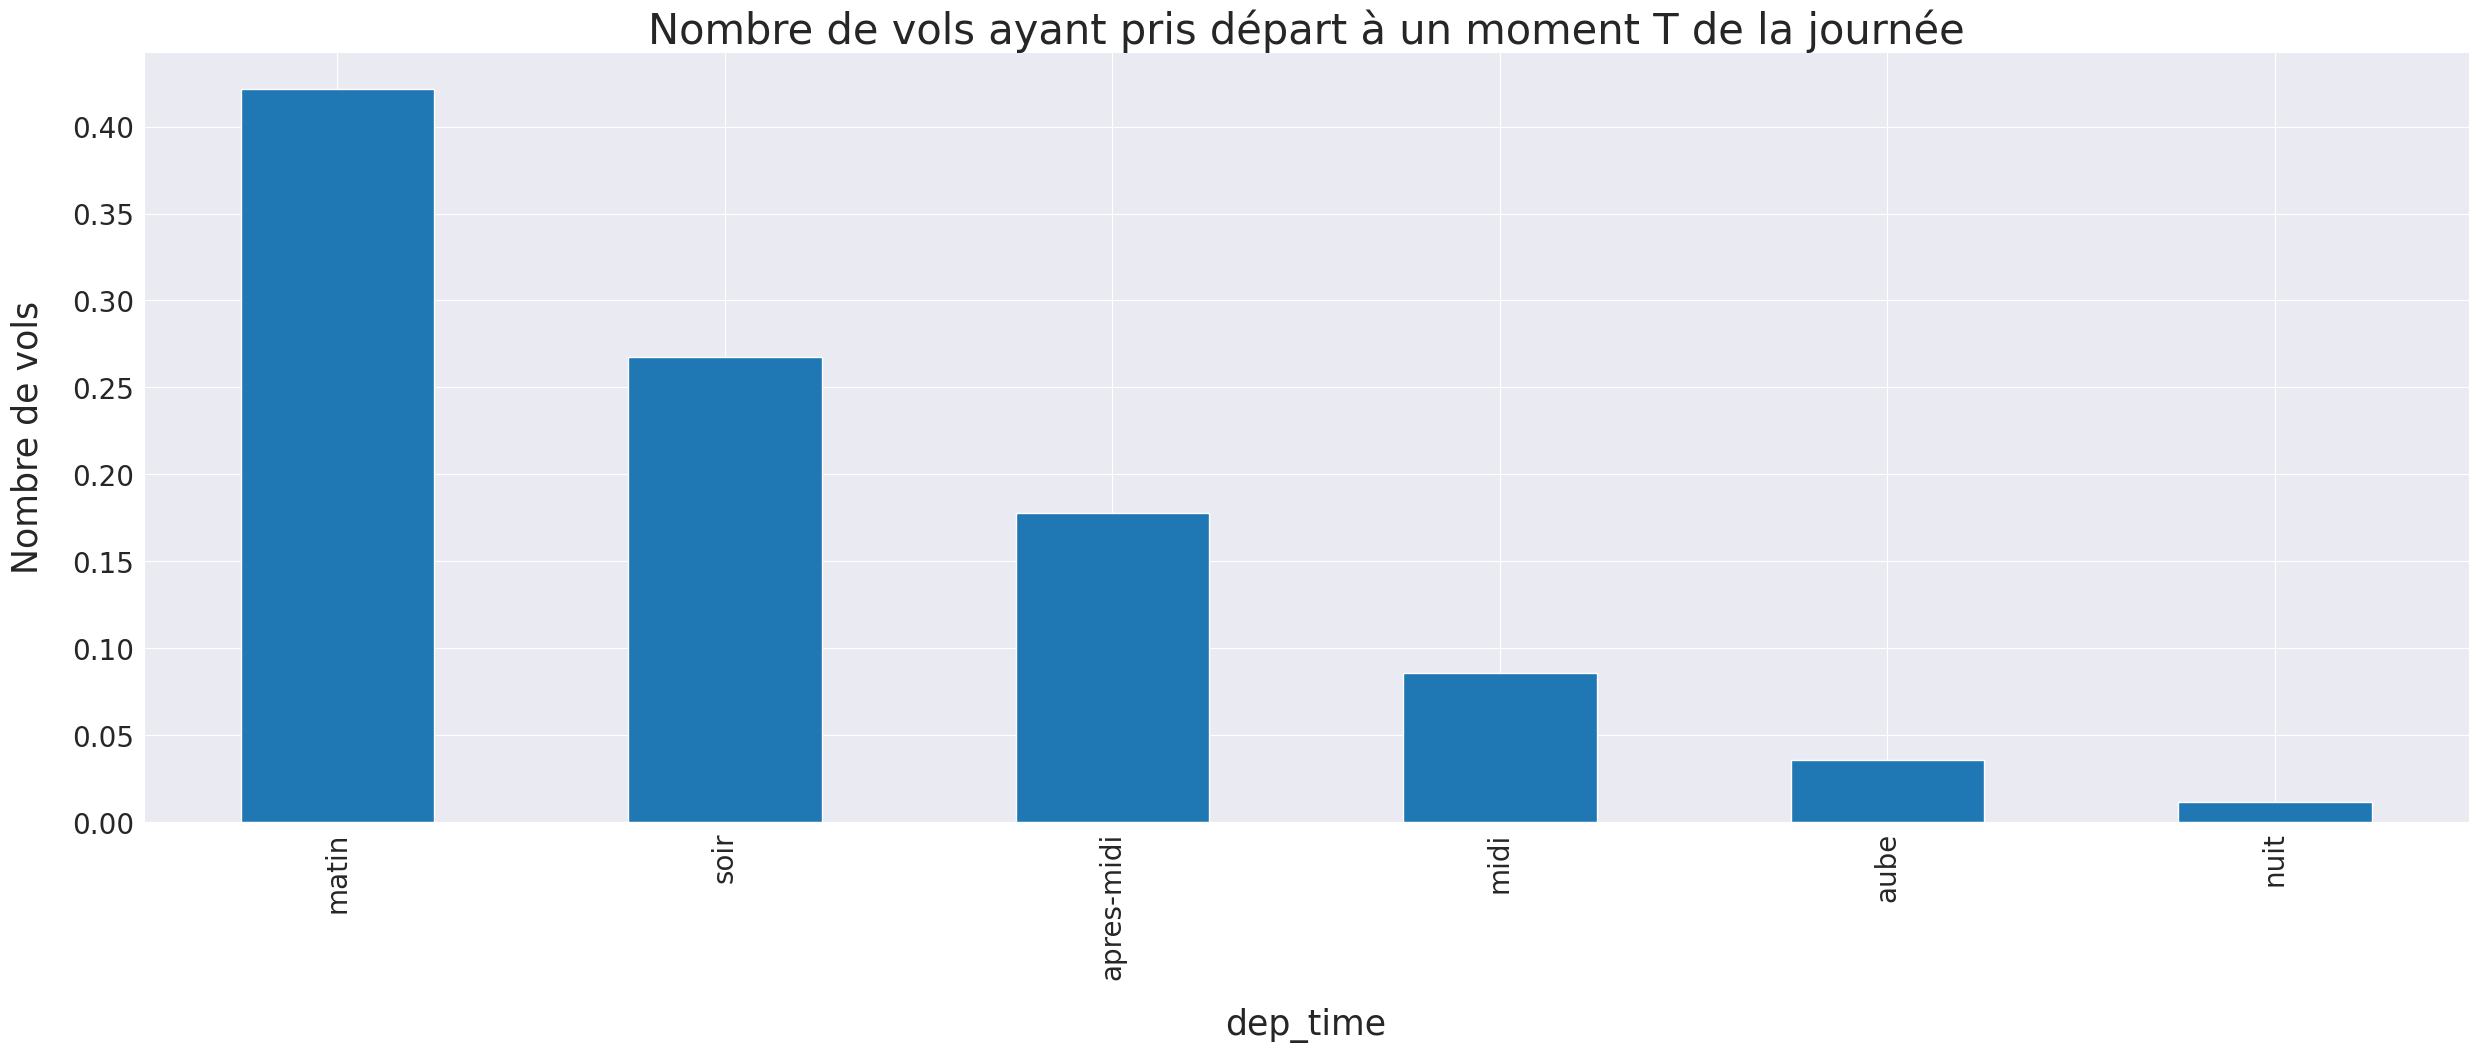

In [135]:
# Visualisation moment de départ
plt.figure(figsize=(30, 10))
plt.title('Nombre de vols ayant pris départ à un moment T de la journée', fontsize=30)
plt.xlabel('Moment de la journée', fontsize=25, labelpad=20); plt.ylabel("Nombre de vols", fontsize=25, labelpad=20)
plt.tick_params(labelsize=20)
data['dep_time'].value_counts(normalize=True).plot(kind='bar')
plt.show()

Les heures de départ des vols sont majoritairement le matin, soit près d'1 vol sur 2 démarre le matin. Puis vient le soir, qui représente 1 vol sur 4.

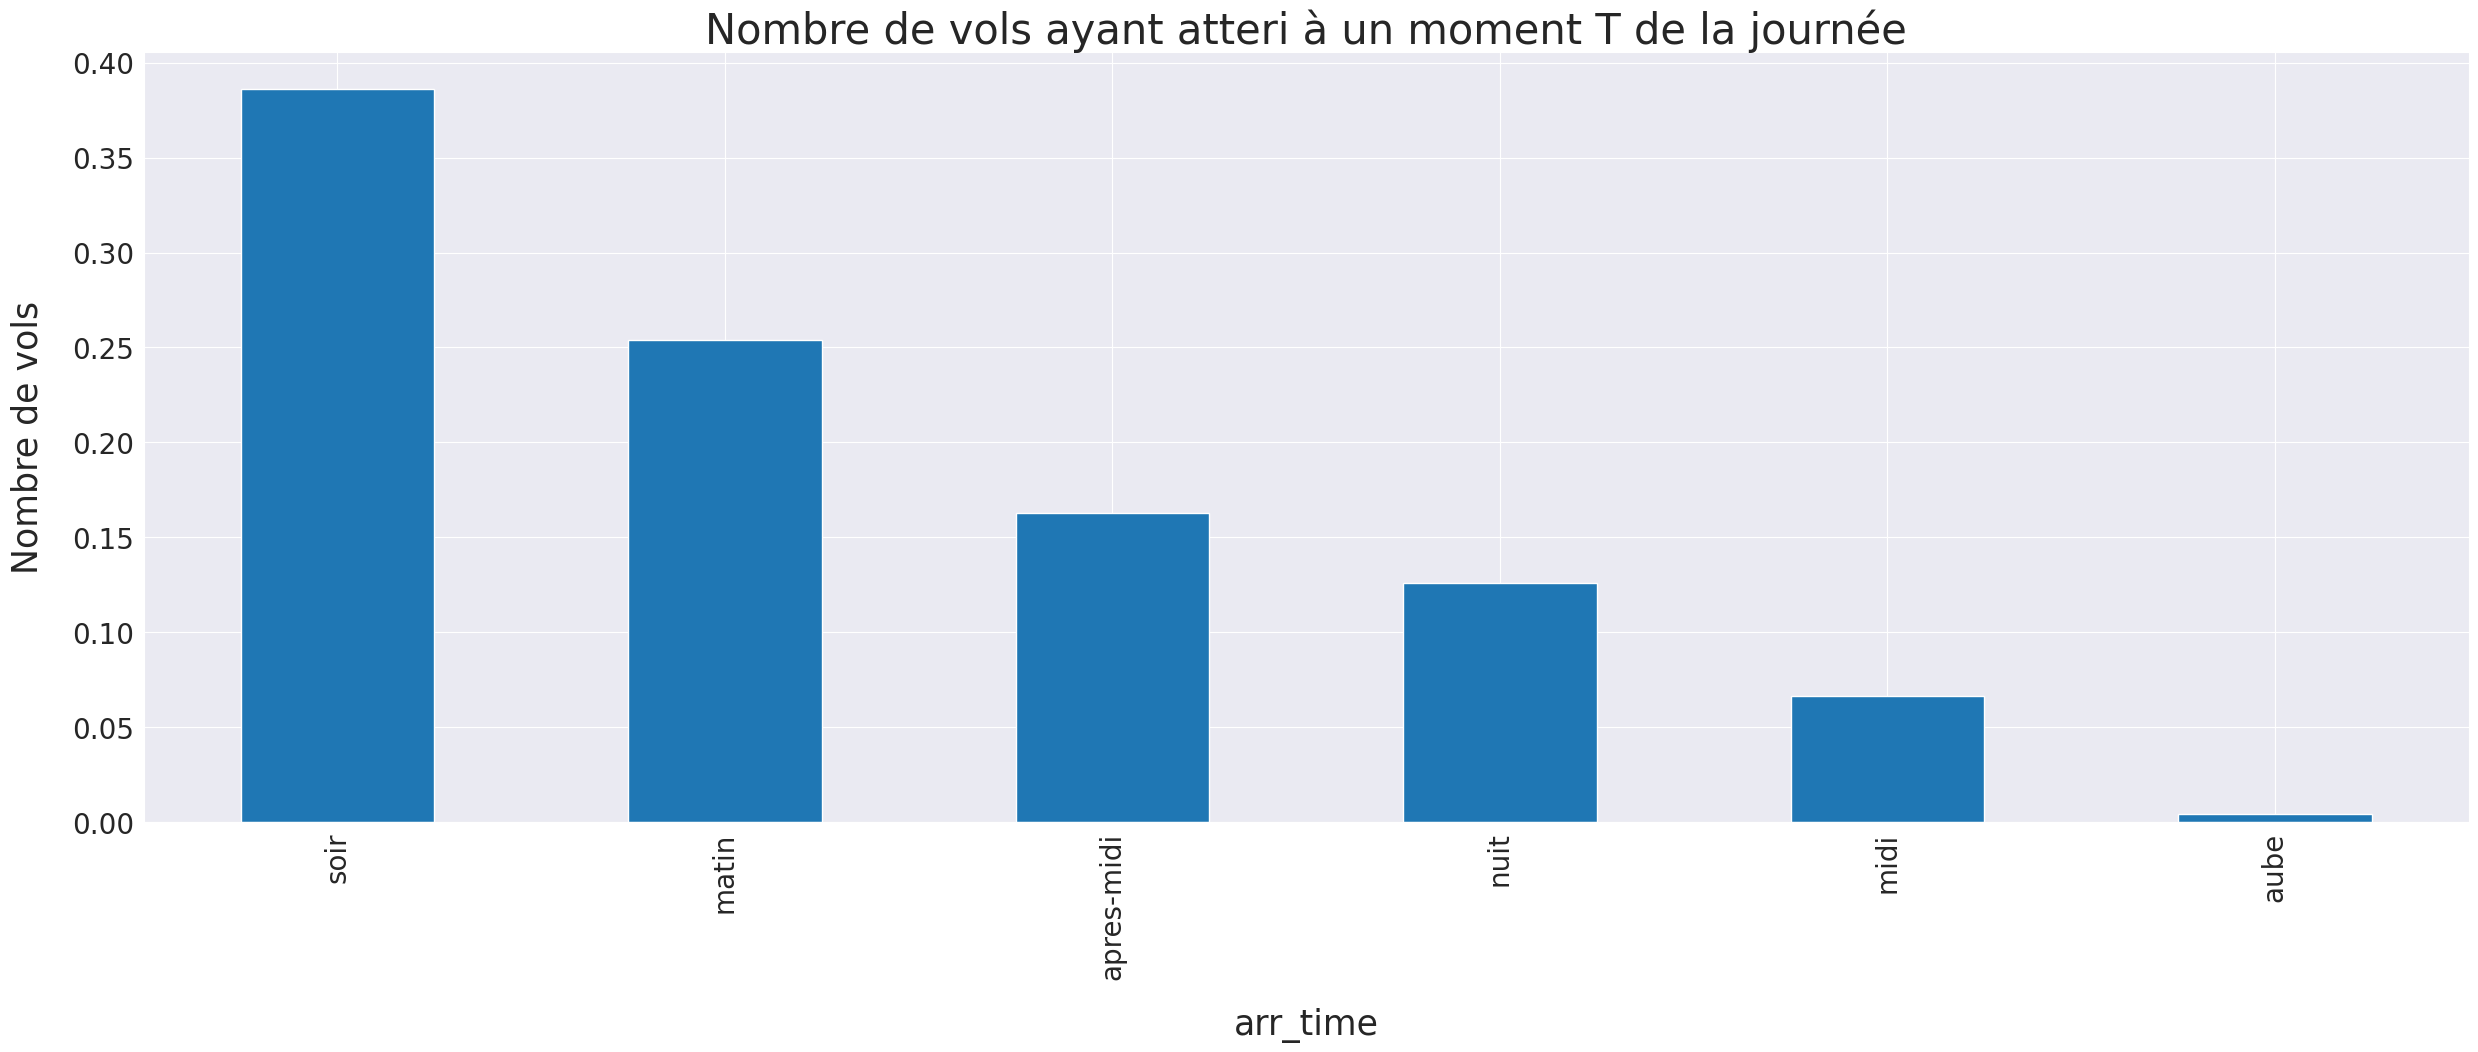

In [136]:
# Visualisation moment d'arrivée
plt.figure(figsize=(30, 10))
plt.title('Nombre de vols ayant atteri à un moment T de la journée', fontsize=30)
plt.xlabel('Moment de la journée', fontsize=25, labelpad=20); plt.ylabel("Nombre de vols", fontsize=25, labelpad=20)
plt.tick_params(labelsize=20)
data['arr_time'].value_counts(normalize=True).plot(kind='bar')
plt.show()

Quant à l'atterissage, c'est l'inverse. 1 vol sur 2 atterrit le soir et 1 vol sur 4 atterit le matin